# Restaurant Turnover Prediction
  * By :Mohammad Sharaf Jan 2023

**Models used:**
* Lasso & Ridge Regression
* ElasticNet
* KNN Regressor
* Random Forest
* Light GBM
* XGBoost
* Ensembling

In [ ]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold


In [ ]:
# loading the train dataset from a shared link
url ='https://drive.google.com/file/d/1NkR4rw3fV_YM3KuDG_dINg2MESj1wOU2/view?usp=share_link';
file_id=url.split('/')[-2];
dwn_url='https://drive.google.com/uc?id=' + file_id;
df = pd.read_csv(dwn_url);

In [ ]:
df['Value Deals Rating'].fillna(value=(np.round(df['Value Deals Rating'].mean(),0).astype(int)), inplace=True)
df['Overall Restaurant Rating'].fillna(value=(np.round(df['Overall Restaurant Rating'].mean(),0).astype(int)), inplace=True)
df['Resturant Tier'].fillna(value=(np.round(df['Resturant Tier'].mean(),0).astype(int)), inplace=True)
df['Live Sports Rating'].fillna(value=(np.round(df['Live Sports Rating'].mean(),0).astype(int)), inplace=True)
df['Instagram Popularity Quotient'].fillna(value=(np.round(df['Instagram Popularity Quotient'].mean(),0).astype(int)), inplace=True)
df['Facebook Popularity Quotient'].fillna(value=(np.round(df['Facebook Popularity Quotient'].mean(),0).astype(int)), inplace=True)
df['Comedy Gigs Rating'].fillna(value=(np.round(df['Comedy Gigs Rating'].mean(),0).astype(int)), inplace=True)
df['Ambience'].fillna(value=(np.round(df['Ambience'].mean(),0).astype(int)), inplace=True)
df['Live Music Rating'].fillna(value=(np.round(df['Live Music Rating'].mean(),0).astype(int)), inplace=True)
df['Opening Day of Restaurant'] = df['Opening Day of Restaurant'].apply(lambda x: pd.to_datetime(x).value)

In [ ]:
df.shape

(3493, 34)

The dataset is quite small so complex models with many parameters should be avoided. Using a complex model for this dataset will cause the model to overfit to the dataset. Regularization techniques will definitely need to be used to prevent the possibility of overfitting.

In [ ]:
# loading the test dataset from a shared link
url ='https://drive.google.com/file/d/1XNGmiBOHyaj6LcXH7WQALDlsFehZgw3_/view?usp=share_link';
file_id=url.split('/')[-2];
dwn_url='https://drive.google.com/uc?id=' + file_id;
test_df = pd.read_csv(dwn_url);

test_df.shape

(500, 33)

In [ ]:
test_df['Comedy Gigs Rating'].fillna(value=(np.round(test_df['Comedy Gigs Rating'].mean(),0).astype(int)), inplace=True)
test_df['Live Music Rating'].fillna(value=(np.round(test_df['Live Music Rating'].mean(),0).astype(int)), inplace=True)
test_df['Live Sports Rating'].fillna(value=(np.round(test_df['Live Sports Rating'].mean(),0).astype(int)), inplace=True)
test_df['Overall Restaurant Rating'].fillna(value=(np.round(test_df['Overall Restaurant Rating'].mean(),0).astype(int)), inplace=True)
test_df['Value Deals Rating'].fillna(value=(np.round(test_df['Value Deals Rating'].mean(),0).astype(int)), inplace=True)
test_df['Endorsed By']=test_df['Endoresed By']
test_df.drop(columns=['Endoresed By'], axis=1)
test_df['Opening Day of Restaurant'] = test_df['Opening Day of Restaurant'].apply(lambda x: pd.to_datetime(x).value)

In [ ]:
df.describe()

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
count,3493.000000,3.493000e+03,3394.000000,3437.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3444.000000,...,3281.000000,2728.000000,1010.000000,786.000000,205.000000,3468.000000,3493.000000,3493.000000,3493.00000,3493.000000
mean,61747.000000,3.072571e+07,77.938715,74.404684,0.788720,0.988262,0.808188,0.801889,0.800172,1.926539,...,8.479427,4.012830,2.932673,3.655216,3.590244,6.423010,6.874893,4.546808,3.23132,6.275122
std,1008.486572,2.165125e+07,9.829169,10.940327,0.408275,0.107719,0.393783,0.398633,0.399928,0.260930,...,1.287233,1.009044,0.859519,0.973250,0.906351,2.050026,1.847131,1.877063,1.99305,1.895057
min,60001.000000,3.500000e+06,43.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,60874.000000,1.800000e+07,72.000000,66.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,7.000000,3.000000,2.000000,3.000000,3.000000,5.000000,6.000000,3.000000,2.00000,5.000000
50%,61747.000000,3.000000e+07,79.000000,74.050000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,7.000000,7.000000,5.000000,3.00000,6.000000
75%,62620.000000,3.700000e+07,85.745000,82.400000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,5.000000,3.000000,4.000000,4.000000,8.000000,8.000000,6.000000,5.00000,8.000000
max,63493.000000,4.000000e+08,97.760000,98.700000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,10.000000,8.000000,6.000000,7.000000,6.000000,10.000000,10.000000,10.000000,10.00000,10.000000


In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

display_all(df.head().transpose())

,0,1,2,3,4
Registration Number,60001,60002,60003,60004,60005
Annual Turnover,42000000,50000000,32500000,110000000,20000000
Cuisine,"indian,irish","indian,irish","tibetan,italian","turkish,nigerian","irish,belgian"
City,Bangalore,Indore,Chennai,Gurgaon,Manesar
Restaurant Location,Near Business Hub,Near Party Hub,Near Business Hub,Near Party Hub,Near Party Hub
Opening Day of Restaurant,14/02/09,29/09/08,30/07/11,30/11/08,22/02/10
Facebook Popularity Quotient,84.3,85.4,85.0,85.6,NaN
Endorsed By,Not Specific,Tier A Celebrity,Tier A Celebrity,Tier A Celebrity,Tier A Celebrity
Instagram Popularity Quotient,95.8,85.0,68.2,83.6,76.8
Fire Audit,1,1,1,0,1


In [ ]:
df.isnull().sum().sort_index()/len(df)

Ambience                         0.0
Annual Turnover                  0.0
City                             0.0
Comedy Gigs Rating               0.0
Comfortablility                  0.0
Cuisine                          0.0
Dedicated Parking                0.0
Endorsed By                      0.0
Facebook Popularity Quotient     0.0
Fire Audit                       0.0
Food Rating                      0.0
Hygiene Rating                   0.0
Instagram Popularity Quotient    0.0
Liquor License Obtained          0.0
Live Music Rating                0.0
Live Sports Rating               0.0
Lively                           0.0
Open Sitting Available           0.0
Opening Day of Restaurant        0.0
Order Wait Time                  0.0
Overall Restaurant Rating        0.0
Privacy                          0.0
Registration Number              0.0
Restaurant City Tier             0.0
Restaurant Location              0.0
Restaurant Theme                 0.0
Restaurant Type                  0.0
R

In [ ]:
df.shape

(3493, 34)

In [ ]:
test_df.isnull().sum().sort_index()/len(df)

Ambience                         0.0
City                             0.0
Comedy Gigs Rating               0.0
Comfortablility                  0.0
Cuisine                          0.0
Dedicated Parking                0.0
Endoresed By                     0.0
Facebook Popularity Quotient     0.0
Fire Audit                       0.0
Food Rating                      0.0
Hygiene Rating                   0.0
Instagram Popularity Quotient    0.0
Liquor License Obtained          0.0
Live Music Rating                0.0
Live Sports Rating               0.0
Lively                           0.0
Open Sitting Available           0.0
Opening Day of Restaurant        0.0
Order Wait Time                  0.0
Overall Restaurant Rating        0.0
Privacy                          0.0
Registration Number              0.0
Restaurant City Tier             0.0
Restaurant Location              0.0
Restaurant Theme                 0.0
Restaurant Type                  0.0
Restaurant Zomato Rating         0.0
R

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


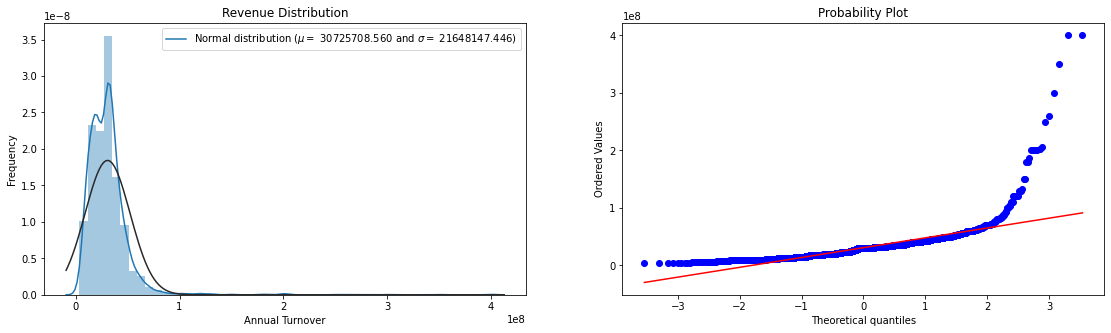

In [ ]:
(mu, sigma) = norm.fit(df['Annual Turnover'])
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(df['Annual Turnover'] , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Revenue Distribution')
ax2 = stats.probplot(df['Annual Turnover'], plot=plt)
f.show();

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


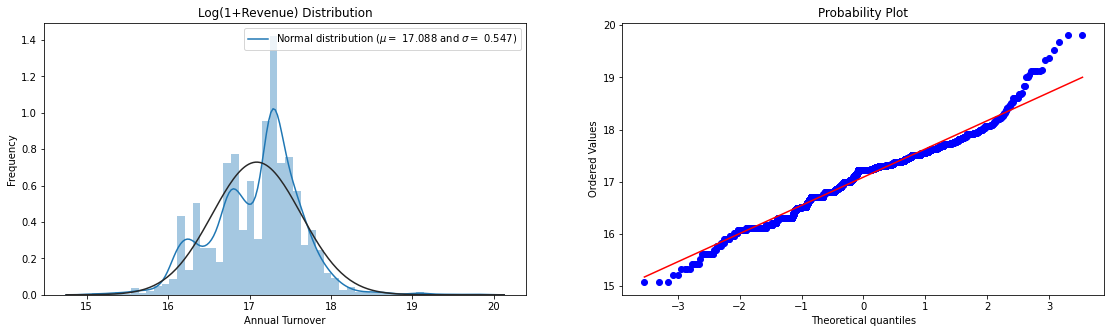

In [ ]:

(mu, sigma) = norm.fit(np.log1p(df['Annual Turnover']))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))
ax1 = sns.distplot(np.log1p(df['Annual Turnover']) , fit=norm, ax=ax1)
ax1.legend([f'Normal distribution ($\mu=$ {mu:.3f} and $\sigma=$ {sigma:.3f})'], loc='best')
ax1.set_ylabel('Frequency')
ax1.set_title('Log(1+Revenue) Distribution')
ax2 = stats.probplot(np.log(df['Annual Turnover']), plot=plt)
f.show();

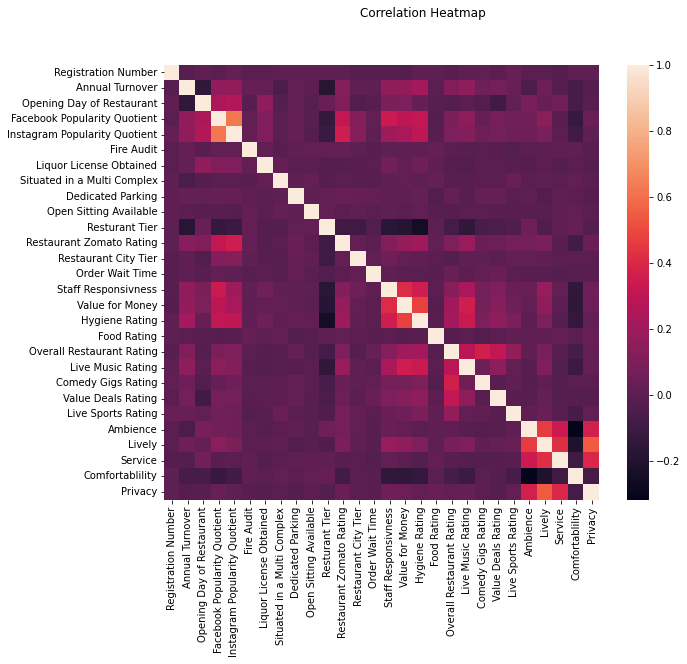

In [ ]:
# Correlation between numeric features with Annual Turnover
plt.figure(figsize=(10, 8))
#sns.heatmap(df.drop(['Annual Turnover','Registration Number'], axis=1).corr(), square=True)
sns.heatmap(df.corr(), square=True)
plt.suptitle('Correlation Heatmap')
plt.show();

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,6.174700e+04,1.008487e+03,6.000100e+04,6.087400e+04,6.174700e+04,6.262000e+04,6.349300e+04
Annual Turnover,3493.0,3.072571e+07,2.165125e+07,3.500000e+06,1.800000e+07,3.000000e+07,3.700000e+07,4.000000e+08
Opening Day of Restaurant,3493.0,1.259401e+18,5.588389e+16,8.462016e+17,1.226362e+18,1.267574e+18,1.299456e+18,1.463875e+18
Facebook Popularity Quotient,3493.0,7.794045e+01,9.688842e+00,4.300000e+01,7.200000e+01,7.880000e+01,8.560000e+01,9.776000e+01
Instagram Popularity Quotient,3493.0,7.439820e+01,1.085237e+01,4.000000e+01,6.640000e+01,7.400000e+01,8.220000e+01,9.870000e+01
Fire Audit,3493.0,7.887203e-01,4.082748e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Liquor License Obtained,3493.0,9.882622e-01,1.077187e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Situated in a Multi Complex,3493.0,8.081878e-01,3.937825e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Dedicated Parking,3493.0,8.018895e-01,3.986329e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Open Sitting Available,3493.0,8.001718e-01,3.999284e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


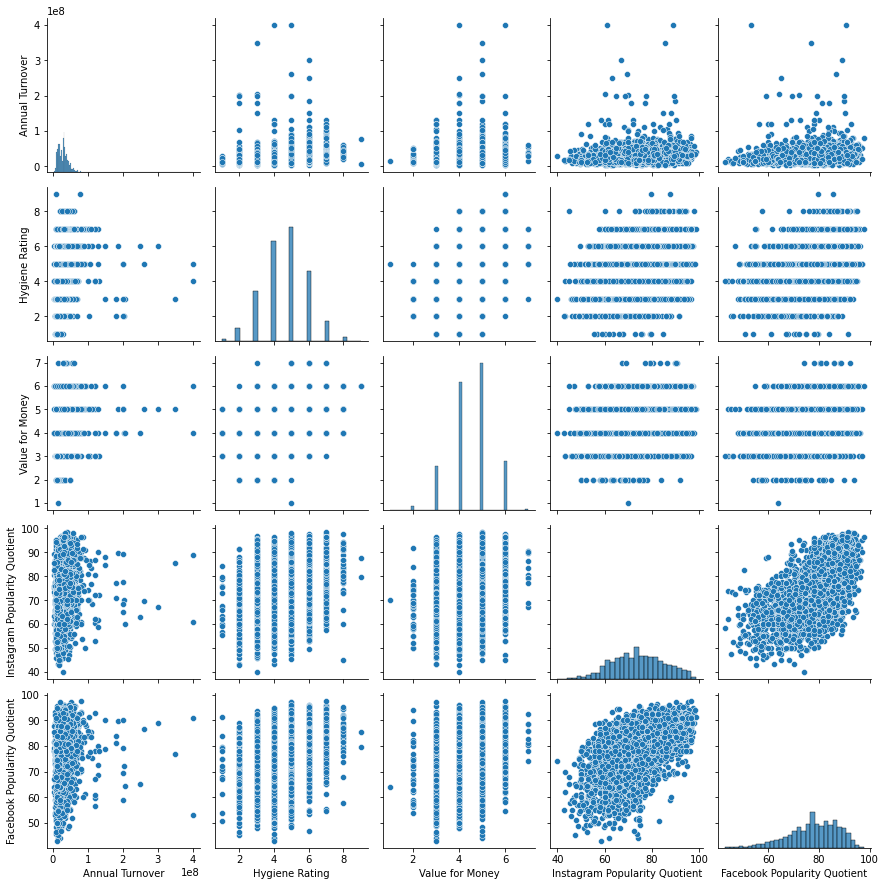

In [ ]:
sns.pairplot(df[df.corr()['Annual Turnover'].sort_values(ascending=False).index[:5]])
plt.show();

# Feature Engineering

If the distribution of the data is left skewed, the skewness values will be negative. If the distribution of the data is right skewed, the skewness values will be positive.

# Ridge and Lasso Regression

In [ ]:
df = pd.get_dummies(df, columns=['Restaurant Type','Restaurant Location','Endorsed By','Cuisine'], drop_first=False)

In [ ]:
test_df = pd.get_dummies(test_df, columns=['Restaurant Type','Restaurant Location','Endorsed By','Cuisine'], drop_first=False)

In [ ]:
X, y = df.drop(columns=['Annual Turnover','City','Restaurant Theme','Resturant Tier'], axis=1), df['Annual Turnover']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [ ]:
X_train.shape

(2794, 55)

In [ ]:
#X, y = df.drop(columns=['Annual Turnover','Cuisine', 'City', 'Restaurant Location', 'Opening Day of Restaurant',
#       'Endorsed By', 'Restaurant Type', 'Restaurant Theme'], axis=1), df['Annual Turnover']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
params_ridge = {
    'alpha' : [22],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=15, n_jobs=-1)
ridge_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
print(f'Best score: {ridge_regressor.best_score_}')

Optimal alpha: 22.00
Optimal fit_intercept: True
Optimal normalize: False
Optimal solver: sparse_cg
Best score: -19240863.611262985


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [ ]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"],
                    normalize=ridge_regressor.best_params_["normalize"], solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(X_train, y_train)
y_train_pred = ridge_model.predict(X_train)
y_pred = ridge_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, (np.round(y_pred,0).astype(int))))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -6.484199561915186
Test r2 score:  0.07856803119126976
Train RMSE: 19525684.9071
Test RMSE: 23500573.0867


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


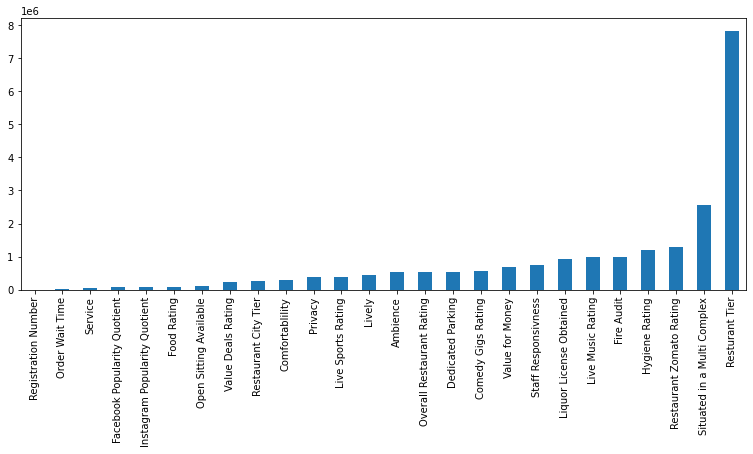

In [ ]:
# Ridge Model Feature Importance
ridge_feature_coef = pd.Series(index = X_train.columns, data = np.abs(ridge_model.coef_))
ridge_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

In [ ]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
    'normalize' : [True,False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(X_train, y_train)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Optimal normalize: {lasso_regressor.best_params_["normalize"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 20.00
Optimal fit_intercept: True
Optimal normalize: True
Best score: -19670791.419587504


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"],
                    normalize=lasso_regressor.best_params_["normalize"])
lasso_model.fit(X_train, y_train)
y_train_pred = lasso_model.predict(X_train)
y_pred = lasso_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, (np.round(y_pred,0).astype(int))))/np.round(y_test.max(),0).astype(int)
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Train r2 score:  -7.5810206887069
Test r2 score:  0.08247425996987379
Train RMSE: 19881853.8453
Test RMSE: 22095175.4080


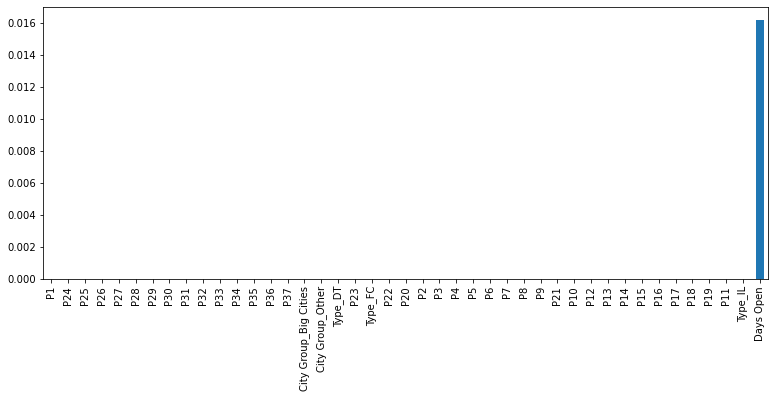

In [ ]:
# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = X_train.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

# ElasticNet (combination of Ridge & Lasso)

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

# Use ElasticNetCV to tune alpha automatically instead of redundantly using ElasticNet and GridSearchCV
el_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=5e-2, cv=7, n_jobs=-1)
el_model.fit(X_train, y_train)
print(f'Optimal alpha: {el_model.alpha_:.6f}')
print(f'Optimal l1_ratio: {el_model.l1_ratio_:.3f}')
print(f'Number of iterations {el_model.n_iter_}')

Optimal alpha: 4336628.864884
Optimal l1_ratio: 1.000
Number of iterations 11


In [ ]:
y_train_pred = el_model.predict(X_train)
y_pred = el_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, (np.round(y_pred,0).astype(int))))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train r2 score:  -32.69773908922132
Test r2 score:  0.02465302826885596
Train RMSE: 20626981.2288
Test RMSE: 22780743.5600


1 features with reduction of 96.15%


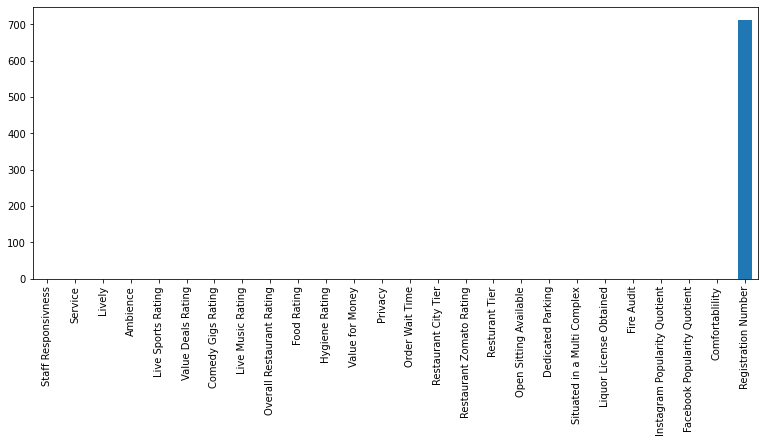

In [ ]:
# ElasticNet Model Feature Importance
el_feature_coef = pd.Series(index = X_train.columns, data = np.abs(el_model.coef_))
n_features = (el_feature_coef>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(el_feature_coef))*100:2.2f}%')
el_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

# XGBoost

In [ ]:
params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 5, n_jobs = -1)
xgb_regressor.fit(X_train, y_train)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

[05:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Optimal lr: 0.1
Optimal colsample_bytree: 0.3
Optimal n_estimators: 30
Best score: -19722606.31513795


In [ ]:
xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"],
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"],
                         max_depth=4, alpha=3, subsample=.5,
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error((np.round(y_pred,0).astype(int)),y_test))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

[05:17:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  -5.1316122571619545
Test r2 score:  0.04721847471037488
Train RMSE: 17280275.5788
Test RMSE: 23897005.2370


In [ ]:
# XGB with early stopping
xgb_model.fit(X_train, y_train, early_stopping_rounds=6,
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

[03:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  -7.13307990156369
Test r2 score:  0.06881158388723219
Train RMSE: 18006259.7436
Test RMSE: 22259074.7356


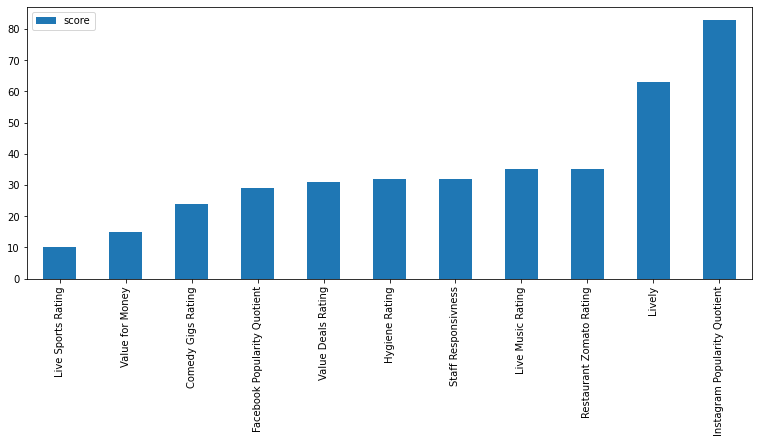

In [ ]:
# XGB Feature Importance, relevant features can be selected based on its score
feature_important = xgb_model.get_booster().get_fscore()
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=['score']).sort_values(by = 'score', ascending=True)
data.plot(kind='bar', figsize = (13,5))
plt.show()

In [ ]:
df['City'].value_counts()

Bangalore      553
-1             396
Noida          324
Hyderabad      295
Pune           262
              ... 
Miryalaguda      1
 mumbai          1
Dharuhera        1
meerut           1
pondy            1
Name: City, Length: 297, dtype: int64

# Submissions

In [ ]:
submission = pd.DataFrame(columns=['Registration Number','Annual Turnover'])
submission['Registration Number'] = test_df['Registration Number']

#xgb_pred = xgb_model.predict(test_df.drop(columns=['Cuisine', 'Opening Day of Restaurant','Restaurant Theme', 'City','Restaurant Type','Restaurant Location','Endorsed By','Endoresed By'], axis=1))
#submission['Annual Turnover'] = np.round(xgb_pred,0).astype(int)

xgb_pred = xgb_model.predict(test_df.drop(columns=['City','Endoresed By','Restaurant Theme','Resturant Tier'], axis=1))
submission['Annual Turnover'] = np.round(xgb_pred,0).astype(int)


#ridge_pred = ridge_model.predict(test_df.drop(columns=['Cuisine', 'Opening Day of Restaurant','Restaurant Theme', 'City','Restaurant Type','Restaurant Location','Endorsed By','Endoresed By'], axis=1))
#submission['Annual Turnover'] = np.round(ridge_pred,0).astype(int)



#xgb_regressor_predict = xgb_regressor.predict(test_df.drop(columns=['Cuisine', 'Opening Day of Restaurant','Restaurant Theme', 'City','Restaurant Type','Restaurant Location','Endorsed By','Endoresed By'], axis=1))
#submission['Annual Turnover'] = np.round(xgb_regressor_predict,0).astype(int)



#el_model_pred = el_model.predict(test_df.drop(columns=['Cuisine', 'Opening Day of Restaurant','Restaurant Theme', 'City','Restaurant Type','Restaurant Location','Endorsed By','Endoresed By'], axis=1))
#submission['Annual Turnover'] = np.round(el_model_pred,0).astype(int)


In [ ]:
from pathlib import Path
filepath = Path('/home/sharaf/Downloads/Hakathon_Sharaf_Submission.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
submission.to_csv(filepath)

In [ ]:
submission.to_csv('Hakathon_Sharaf_Submission.csv',  sep='\t', encoding='utf-8')

In [ ]:
submission[['Registration Number','Annual Turnover']].head(500)

,Registration Number,Annual Turnover
0,20001,22899176
1,20002,33209254
2,20003,23484302
3,20004,39086232
4,20005,33053826
...,...,...
495,20496,31788348
496,20497,31475220
497,20498,32912832
498,20499,45657816


In [ ]:
submission[['Registration Number','Annual Turnover']].head(500)

,Registration Number,Annual Turnover
0,20001,25325008
1,20002,35352928
2,20003,27341436
3,20004,32136896
4,20005,32974684
...,...,...
495,20496,30097336
496,20497,21681388
497,20498,35269788
498,20499,40737924


In [ ]:
df[['Registration Number','Annual Turnover']].head(20)

,Registration Number,Annual Turnover
0,60001,42000000
1,60002,50000000
2,60003,32500000
3,60004,110000000
4,60005,20000000
5,60006,30000000
6,60007,30000000
7,60008,40000000
8,60009,60000000
9,60010,23000000
